In [ ]:
! pip install astroNN
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import utils

from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 7.0 MB/s eta 0:00:00


In [ ]:
from astroNN.datasets import load_galaxy10sdss
images, labels = load_galaxy10sdss()

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

x_train = x_train / 255.0
x_test = x_test / 255.0

Galaxy10.h5:  99%|█████████▉| 209M/210M [00:16<00:00, 14.5MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:17, 12.1MB/s]                           


In [ ]:
x_train.shape, x_test.shape

((17428, 69, 69, 3), (4357, 69, 69, 3))

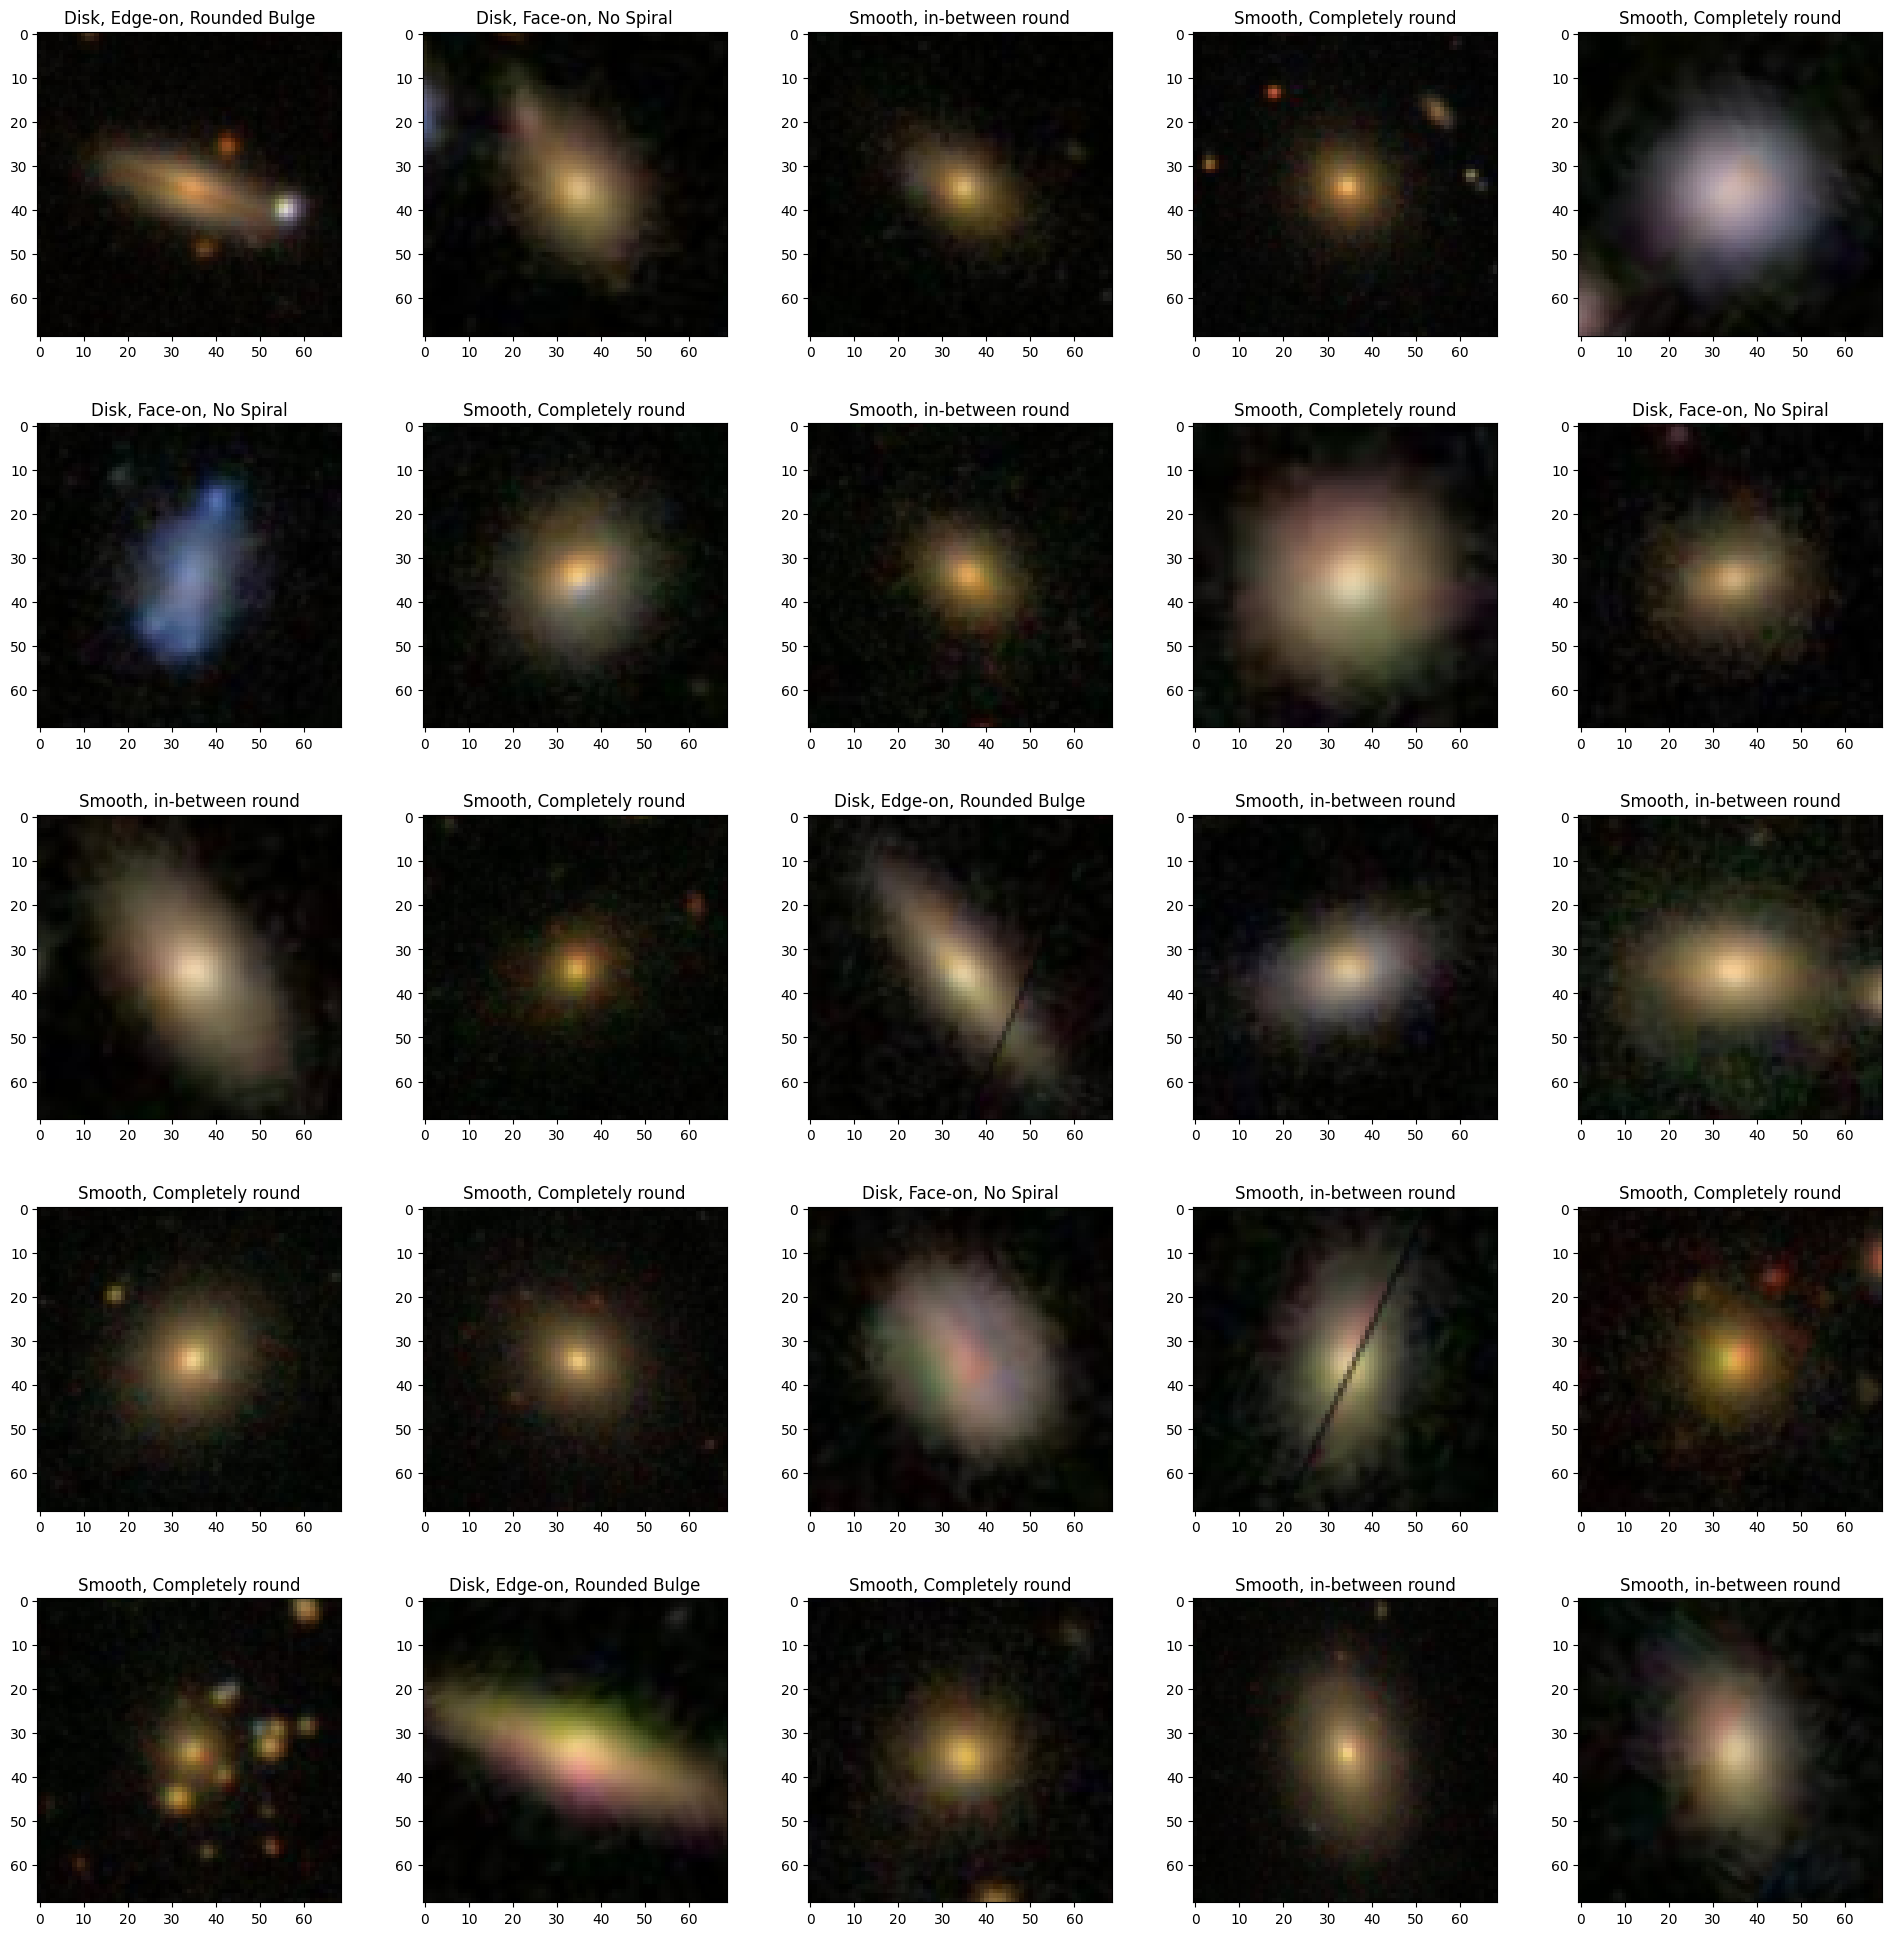

In [ ]:
fig = plt.figure(figsize=(20,20)) 

for i in range(25):
    plt.subplot(5,5,i+1)    
    plt.imshow(x_train[i])
    plt.title(features[y_train[i]])
    fig.tight_layout(pad=3.0)
    
plt.show()

In [ ]:
df = pd.DataFrame(data=labels)

counts = df.value_counts().sort_index()
print(counts)

0    3461
1    6997
2    6292
3     349
4    1534
5      17
6     589
7    1121
8     906
9     519
dtype: int64


<ipython-input-6-f05667dac736>:4: UserWarning: FixedFormatter should only be used together with FixedLocator


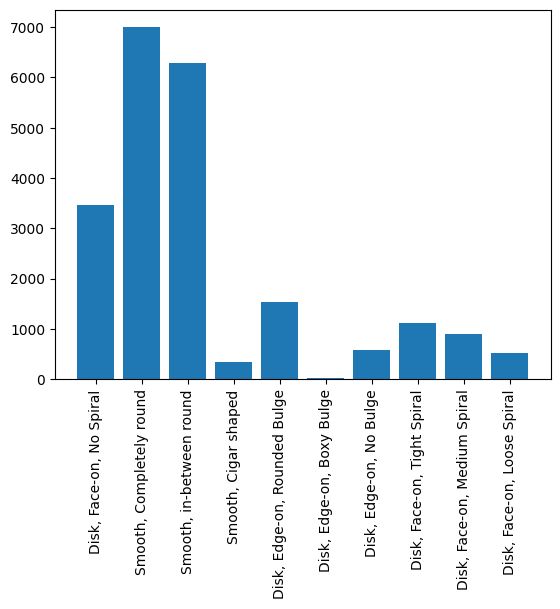

In [ ]:
def class_distribution(x, y, labels):
    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_xticklabels(labels, rotation=90)
    plt.show()
    
class_distribution(features, counts, features)

In [ ]:
model_optimizer = Adam(lr=0.001)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.


In [ ]:
def lenet5(input_shape, num_classes):
  model = Sequential()

  # LeNet-5 conv-net architecture
  model.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=input_shape))
  model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh'))
  model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(units=120, activation='tanh'))
  model.add(Dense(units=84, activation='tanh'))
  model.add(Dense(units=num_classes, activation='softmax'))

  return model

In [ ]:
model = lenet5((69,69,3), 10)


reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")

model.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, callbacks=[reduceLR])

Epoch 1/10
545/545 [==============================] - 11s 4ms/step - loss: 1.3118 - accuracy: 0.4958 - lr: 0.0010
Epoch 2/10
545/545 [==============================] - 2s 3ms/step - loss: 0.8593 - accuracy: 0.6878 - lr: 0.0010
Epoch 3/10
545/545 [==============================] - 2s 3ms/step - loss: 0.7280 - accuracy: 0.7359 - lr: 0.0010
Epoch 4/10
545/545 [==============================] - 2s 3ms/step - loss: 0.6408 - accuracy: 0.7667 - lr: 0.0010
Epoch 5/10
545/545 [==============================] - 2s 3ms/step - loss: 0.5866 - accuracy: 0.7864 - lr: 0.0010
Epoch 6/10
545/545 [==============================] - 2s 3ms/step - loss: 0.5180 - accuracy: 0.8117 - lr: 0.0010
Epoch 7/10
545/545 [==============================] - 2s 3ms/step - loss: 0.4580 - accuracy: 0.8326 - lr: 0.0010
Epoch 8/10
545/545 [==============================] - 2s 3ms/step - loss: 0.3996 - accuracy: 0.8553 - lr: 0.0010
Epoch 9/10
545/545 [==============================] - 2s 3ms/step - loss: 0.3493 - accuracy: 0.

In [ ]:
predict = model.predict(x_test).argmax(axis=1)

for i in range(10):
    print("Actual:", features[y_test[i]])
    print("Prediction:", features[np.argmax(predict[i])])
    print("-----")
    print()

137/137 [==============================] - 0s 2ms/step
Actual: Disk, Face-on, No Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Medium Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, No Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Loose Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Tight Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Medium Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----



In [ ]:
classification_report(y_test, predict)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


'              precision    recall  f1-score   support\n\n           0       0.51      0.43      0.46       687\n           1       0.86      0.92      0.89      1397\n           2       0.78      0.89      0.83      1240\n           3       0.46      0.44      0.45        71\n           4       0.77      0.86      0.81       299\n           5       0.00      0.00      0.00         2\n           6       0.81      0.71      0.76       125\n           7       0.41      0.29      0.34       244\n           8       0.43      0.34      0.38       182\n           9       0.51      0.20      0.29       110\n\n    accuracy                           0.74      4357\n   macro avg       0.55      0.51      0.52      4357\nweighted avg       0.72      0.74      0.72      4357\n'

In [ ]:
def MiniVGG(input_shape, num_classes):
    model = Sequential()
    
    # Convolutional block 1
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Convolutional block 2
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Fully connected block
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [ ]:
model = lenet5((69,69,3), 10)


reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")

model.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, callbacks=[reduceLR])

Epoch 1/10
545/545 [==============================] - 2s 3ms/step - loss: 1.7699 - accuracy: 0.3083 - lr: 0.0010
Epoch 2/10
545/545 [==============================] - 2s 3ms/step - loss: 1.7561 - accuracy: 0.3093 - lr: 0.0010
Epoch 3/10
545/545 [==============================] - 2s 3ms/step - loss: 1.7458 - accuracy: 0.3213 - lr: 1.0000e-06
Epoch 4/10
545/545 [==============================] - 2s 3ms/step - loss: 1.7430 - accuracy: 0.3213 - lr: 1.0000e-06
Epoch 5/10
545/545 [==============================] - 2s 3ms/step - loss: 1.7418 - accuracy: 0.3213 - lr: 1.0000e-09
Epoch 6/10
545/545 [==============================] - 2s 3ms/step - loss: 1.7418 - accuracy: 0.3213 - lr: 1.0000e-12
Epoch 7/10
545/545 [==============================] - 2s 3ms/step - loss: 1.7418 - accuracy: 0.3213 - lr: 1.0000e-15
Epoch 8/10
545/545 [==============================] - 2s 3ms/step - loss: 1.7418 - accuracy: 0.3213 - lr: 1.0000e-18
Epoch 9/10
545/545 [==============================] - 2s 3ms/step - loss

In [ ]:
predict = model.predict(x_test).argmax(axis=1)

for i in range(10):
    print("Actual:", features[y_test[i]])
    print("Prediction:", features[np.argmax(predict[i])])
    print("-----")
    print()

137/137 [==============================] - 0s 2ms/step
Actual: Disk, Face-on, No Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Medium Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, No Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Loose Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Tight Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Medium Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----



In [ ]:
classification_report(y_test, predict)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       687\n           1       0.32      1.00      0.49      1397\n           2       0.00      0.00      0.00      1240\n           3       0.00      0.00      0.00        71\n           4       0.00      0.00      0.00       299\n           5       0.00      0.00      0.00         2\n           6       0.00      0.00      0.00       125\n           7       0.00      0.00      0.00       244\n           8       0.00      0.00      0.00       182\n           9       0.00      0.00      0.00       110\n\n    accuracy                           0.32      4357\n   macro avg       0.03      0.10      0.05      4357\nweighted avg       0.10      0.32      0.16      4357\n'

In [ ]:
def AlexNet(input_shape, num_classes):
    model = Sequential()
    
    # Convolutional block 1
    model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    
    # Convolutional block 2
    model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    
    # Convolutional block 3
    model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    
    # Convolutional block 4
    model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    
    # Convolutional block 5
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    
    # Fully connected block
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
model = AlexNet((69,69,3), 10)


reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")

model.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, callbacks=[reduceLR])

Epoch 1/10
545/545 [==============================] - 4s 5ms/step - loss: 2.3032 - accuracy: 0.0913 - lr: 1.0000e-27
Epoch 2/10
545/545 [==============================] - 2s 5ms/step - loss: 2.3033 - accuracy: 0.0898 - lr: 1.0000e-27
Epoch 3/10
545/545 [==============================] - 2s 4ms/step - loss: 2.3032 - accuracy: 0.0927 - lr: 1.0000e-30
Epoch 4/10
545/545 [==============================] - 2s 4ms/step - loss: 2.3031 - accuracy: 0.0928 - lr: 1.0000e-33
Epoch 5/10
545/545 [==============================] - 2s 4ms/step - loss: 2.3032 - accuracy: 0.0865 - lr: 1.0000e-36
Epoch 6/10
545/545 [==============================] - 2s 4ms/step - loss: 2.3032 - accuracy: 0.0898 - lr: 1.0000e-39
Epoch 7/10
545/545 [==============================] - 2s 4ms/step - loss: 2.3032 - accuracy: 0.0904 - lr: 1.0005e-42
Epoch 8/10
545/545 [==============================] - 2s 4ms/step - loss: 2.3032 - accuracy: 0.0888 - lr: 1.4013e-45
Epoch 9/10
545/545 [==============================] - 2s 4ms/ste

In [ ]:
predict = model.predict(x_test).argmax(axis=1)

for i in range(10):
    print("Actual:", features[y_test[i]])
    print("Prediction:", features[np.argmax(predict[i])])
    print("-----")
    print()

137/137 [==============================] - 0s 3ms/step
Actual: Disk, Face-on, No Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Medium Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, No Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Loose Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Tight Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Medium Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----



In [ ]:
classification_report(y_test, predict)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       687\n           1       0.00      0.00      0.00      1397\n           2       0.00      0.00      0.00      1240\n           3       0.00      0.00      0.00        71\n           4       0.00      0.00      0.00       299\n           5       0.00      0.00      0.00         2\n           6       0.00      0.00      0.00       125\n           7       0.00      0.00      0.00       244\n           8       0.05      0.86      0.09       182\n           9       0.04      0.35      0.08       110\n\n    accuracy                           0.04      4357\n   macro avg       0.01      0.12      0.02      4357\nweighted avg       0.00      0.04      0.01      4357\n'

In [ ]:
def SimpleNet(input_shape, num_classes):
    model = Sequential()
    
    # Convolutional block 1
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Convolutional block 2
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Convolutional block 3
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Fully connected block
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [ ]:
model = SimpleNet((69,69,3), 10)


reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")

model.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, callbacks=[reduceLR])

Epoch 1/10
545/545 [==============================] - 3s 4ms/step - loss: 2.2977 - accuracy: 0.1006 - lr: 0.0000e+00
Epoch 2/10
545/545 [==============================] - 2s 4ms/step - loss: 2.2984 - accuracy: 0.1000 - lr: 0.0000e+00
Epoch 3/10
545/545 [==============================] - 2s 4ms/step - loss: 2.2987 - accuracy: 0.0976 - lr: 0.0000e+00
Epoch 4/10
545/545 [==============================] - 2s 4ms/step - loss: 2.2975 - accuracy: 0.1029 - lr: 0.0000e+00
Epoch 5/10
545/545 [==============================] - 2s 4ms/step - loss: 2.2979 - accuracy: 0.1000 - lr: 0.0000e+00
Epoch 6/10
545/545 [==============================] - 2s 4ms/step - loss: 2.2984 - accuracy: 0.0993 - lr: 0.0000e+00
Epoch 7/10
545/545 [==============================] - 2s 4ms/step - loss: 2.2984 - accuracy: 0.0955 - lr: 0.0000e+00
Epoch 8/10
545/545 [==============================] - 2s 4ms/step - loss: 2.2987 - accuracy: 0.0965 - lr: 0.0000e+00
Epoch 9/10
545/545 [==============================] - 2s 4ms/ste

In [ ]:
predict = model.predict(x_test).argmax(axis=1)

for i in range(10):
    print("Actual:", features[y_test[i]])
    print("Prediction:", features[np.argmax(predict[i])])
    print("-----")
    print()

137/137 [==============================] - 0s 3ms/step
Actual: Disk, Face-on, No Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Medium Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, No Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Loose Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Tight Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Medium Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----



In [ ]:
classification_report(y_test, predict)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


'              precision    recall  f1-score   support\n\n           0       0.10      0.00      0.00       687\n           1       0.00      0.00      0.00      1397\n           2       0.14      0.01      0.01      1240\n           3       0.00      0.00      0.00        71\n           4       0.00      0.00      0.00       299\n           5       0.00      0.00      0.00         2\n           6       0.00      0.00      0.00       125\n           7       0.00      0.00      0.00       244\n           8       0.04      0.98      0.08       182\n           9       0.00      0.00      0.00       110\n\n    accuracy                           0.04      4357\n   macro avg       0.03      0.10      0.01      4357\nweighted avg       0.06      0.04      0.01      4357\n'

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, concatenate, Input, Activation
from keras.layers import BatchNormalization
from keras.utils import plot_model

# Define the Fire module
def fire_module(input, fire_id, squeeze=16, expand=64):
    squeeze = Conv2D(squeeze, (1,1), padding='valid', activation='relu', name='fire'+str(fire_id)+'_squeeze')(input)
    expand_1x1 = Conv2D(expand, (1,1), padding='valid', activation='relu', name='fire'+str(fire_id)+'_expand_1x1')(squeeze)
    expand_3x3 = Conv2D(expand, (3,3), padding='same', activation='relu', name='fire'+str(fire_id)+'_expand_3x3')(squeeze)
    output = concatenate([expand_1x1, expand_3x3], axis=-1, name='fire'+str(fire_id)+'_concat')
    return output

# Define the SqueezeNet model
def SqueezeNet(input_shape, num_classes):
    input = Input(shape=input_shape)
    
    x = Conv2D(64, (3,3), strides=(2,2), padding='valid', activation='relu', name='conv1')(input)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), name='maxpool1')(x)
    
    x = fire_module(x, fire_id=2, squeeze=16, expand=64)
    x = fire_module(x, fire_id=3, squeeze=16, expand=64)
    
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), name='maxpool3')(x)
    
    x = fire_module(x, fire_id=4, squeeze=32, expand=128)
    x = fire_module(x, fire_id=5, squeeze=32, expand=128)
    
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), name='maxpool5')(x)
    
    x = fire_module(x, fire_id=6, squeeze=48, expand=192)
    x = fire_module(x, fire_id=7, squeeze=48, expand=192)
    x = fire_module(x, fire_id=8, squeeze=64, expand=256)
    x = fire_module(x, fire_id=9, squeeze=64, expand=256)
    
    x = Dropout(0.5, name='dropout')(x)
    
    x = Conv2D(num_classes, (1,1), padding='valid', activation='relu', name='conv10')(x)
    x = GlobalAveragePooling2D(name='avgpool10')(x)
    output = Activation('softmax', name='softmax')(x)
    
    model = Model(input, output, name='SqueezeNet')
    return model

In [ ]:
model = SimpleNet((69,69,3), 10)


reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")

model.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, callbacks=[reduceLR])

Epoch 1/10
545/545 [==============================] - 3s 4ms/step - loss: 2.3097 - accuracy: 0.0764 - lr: 0.0000e+00
Epoch 2/10
545/545 [==============================] - 2s 4ms/step - loss: 2.3097 - accuracy: 0.0803 - lr: 0.0000e+00
Epoch 3/10
545/545 [==============================] - 2s 4ms/step - loss: 2.3100 - accuracy: 0.0713 - lr: 0.0000e+00
Epoch 4/10
545/545 [==============================] - 2s 4ms/step - loss: 2.3102 - accuracy: 0.0745 - lr: 0.0000e+00
Epoch 5/10
545/545 [==============================] - 2s 4ms/step - loss: 2.3100 - accuracy: 0.0744 - lr: 0.0000e+00
Epoch 6/10
545/545 [==============================] - 2s 4ms/step - loss: 2.3103 - accuracy: 0.0734 - lr: 0.0000e+00
Epoch 7/10
545/545 [==============================] - 2s 4ms/step - loss: 2.3091 - accuracy: 0.0735 - lr: 0.0000e+00
Epoch 8/10
545/545 [==============================] - 2s 4ms/step - loss: 2.3096 - accuracy: 0.0730 - lr: 0.0000e+00
Epoch 9/10
545/545 [==============================] - 2s 4ms/ste

In [ ]:
predict = model.predict(x_test).argmax(axis=1)

for i in range(10):
    print("Actual:", features[y_test[i]])
    print("Prediction:", features[np.argmax(predict[i])])
    print("-----")
    print()

137/137 [==============================] - 0s 2ms/step
Actual: Disk, Face-on, No Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Medium Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, No Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Loose Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Tight Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Medium Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----



In [ ]:
classification_report(y_test, predict)

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       687\n           1       0.14      0.00      0.00      1397\n           2       0.00      0.00      0.00      1240\n           3       0.07      0.10      0.08        71\n           4       0.05      0.43      0.10       299\n           5       0.00      0.00      0.00         2\n           6       0.11      0.07      0.09       125\n           7       0.00      0.00      0.00       244\n           8       0.06      0.55      0.11       182\n           9       0.04      0.02      0.03       110\n\n    accuracy                           0.06      4357\n   macro avg       0.05      0.12      0.04      4357\nweighted avg       0.06      0.06      0.02      4357\n'